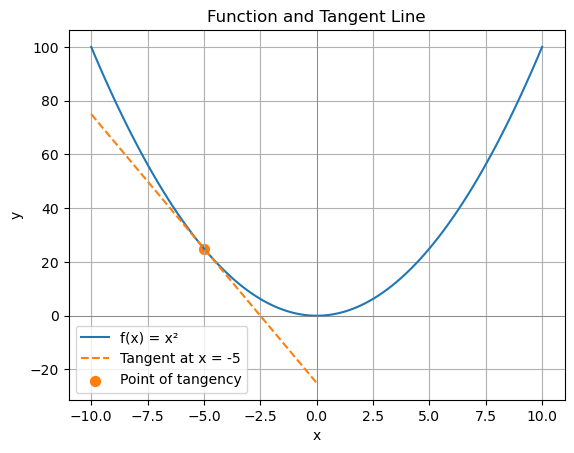

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def expr(x):
    return x**2

def expr_der(x):
    return 2 * x

# Create values for the function
values = np.linspace(-10, 10, 100)

# Plot the function
plt.plot(values, expr(values), label='f(x) = x²')

# Add point where we want to calculate the derivative
x1 = -5
y1 = expr(x1)

# Define x range for tangent line
xrange = np.linspace(x1 - 5, x1 + 5, 10)

# Define tangent line: y = m*(x - x1) + y1
def line(x, x1, y1):
    return expr_der(x1) * (x - x1) + y1

# Add tangent and touching point
plt.plot(xrange, line(xrange, x1, y1), '--', label='Tangent at x = -5')
plt.scatter(x1, y1, s=50, c='C1', label='Point of tangency')

# Enhance plot
plt.title("Function and Tangent Line")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.show()

In the code below:

* We use a linear model $\hat{y} = m \cdot x$.
* The MSE is computed as

  $$
  \text{MSE}(\theta) = \frac{1}{m} \sum_{i=1}^m (y^{(i)} - \theta x^{(i)})^2
  $$
* The graph shows how the MSE varies depending on the choice of the slope $\theta$.

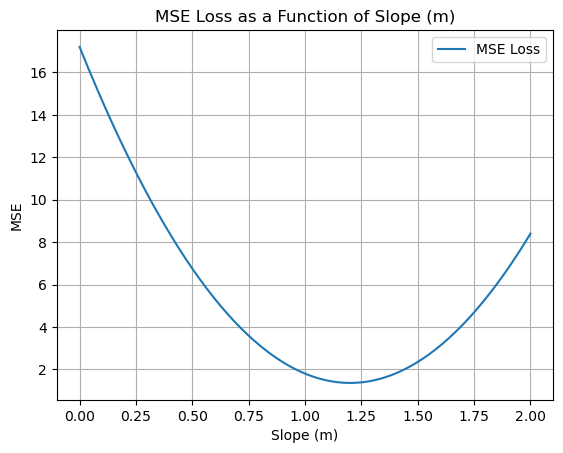

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Toy dataset: 5 data points
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Define MSE loss for model y = m * x
def mse_loss(m, X, y):
    y_pred = m * X
    return np.mean((y - y_pred)**2)

# Evaluate MSE loss for a range of slope values
m_values = np.linspace(0, 2, 200)
loss_values = [mse_loss(m, X, y) for m in m_values]

# Plot MSE as a function of slope m
plt.plot(m_values, loss_values, label="MSE Loss")
plt.xlabel("Slope (m)")
plt.ylabel("MSE")
plt.title("MSE Loss as a Function of Slope (m)")
plt.grid(True)
plt.legend()
plt.show()


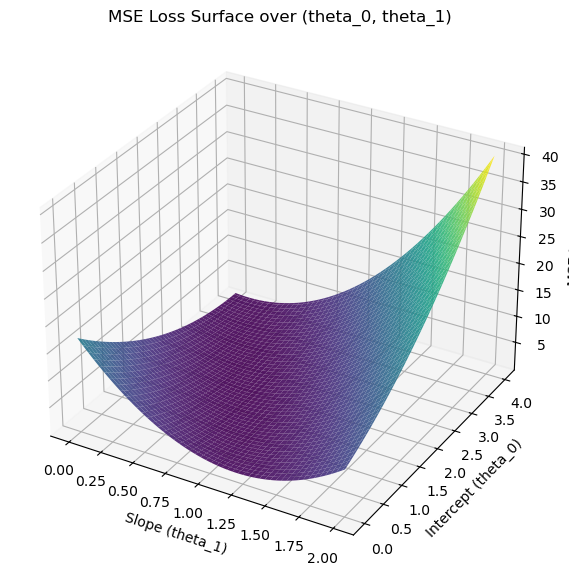

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Toy dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Define MSE loss for model y = theta_0 + theta_1 * x
def mse_loss(theta_0, theta_1, X, y):
    y_pred = theta_0 +theta_1 * X 
    return np.mean((y - y_pred)**2)

# Create a grid of (m, b) values
slope_vals = np.linspace(0, 2, 100)
intercept_vals = np.linspace(0, 4, 100)
M, B = np.meshgrid(slope_vals, intercept_vals)

# Compute MSE for each (theta_0, theta_1) pair
Z = np.array([[mse_loss(theta_0, theta_1, X, y) for theta_1 in slope_vals] for theta_0 in intercept_vals])

# Plot the MSE surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, cmap='viridis', alpha=0.9)
ax.set_xlabel('Slope (theta_1)')
ax.set_ylabel('Intercept (theta_0)')
ax.set_zlabel('MSE Loss')
ax.set_title('MSE Loss Surface over (theta_0, theta_1)')
plt.show()


### 🔍 Step-by-step Expansion:

A linear regression with model follows:

$$
\hat{y}_i = \theta_1 x_i + \theta_0
$$

The **MSE loss** is:

$$
L(\theta_1, \theta_0) = \frac{1}{n} \sum_{i=1}^n (y_i - (\theta_1 x_i + \theta_0))^2
$$

Expand the squared term:

$$
(y_i - \theta_1 x_i - \theta_0)^2 = y_i^2 - 2y_i(\theta_1 x_i + \theta_0) + (\theta_1 x_i + \theta_0)^2
$$

Expand the square:

$$
= y_i^2 - 2y_i \theta_1 x_i - 2y_i \theta_0 + \theta_1^2 x_i^2 + 2\theta_1 \theta_0 x_i + \theta_0^2
$$

Now sum over all $i$ and divide by $n$:

$$
L(\theta_1, \theta_0) = \frac{1}{n} \sum_{i=1}^n \left[
y_i^2 - 2y_i \theta_1 x_i - 2y_i \theta_0 + \theta_1^2 x_i^2 + 2\theta_1 \theta_0 x_i + \theta_0^2
\right]
$$

Group terms:

$$
L(\theta_1, \theta_0) =
\underbrace{\frac{1}{n} \sum y_i^2}_{\text{constant}} 
- 2\theta_1 \underbrace{\frac{1}{n} \sum y_i x_i}_{\text{linear in } \theta_1} 
- 2\theta_0 \underbrace{\frac{1}{n} \sum y_i}_{\text{linear in } \theta_0}
+ \theta_1^2 \underbrace{\frac{1}{n} \sum x_i^2}_{\text{quadratic in } \theta_1}
+ 2\theta_1 \theta_0 \underbrace{\frac{1}{n} \sum x_i}_{\text{cross term}}
+ \theta_0^2
$$

---

### 🧾 Final Form:

Let:

* $A = \frac{1}{n} \sum x_i^2$
* $B = \frac{1}{n} \sum x_i$
* $C = \frac{1}{n} \sum y_i x_i$
* $D = \frac{1}{n} \sum y_i$
* $E = \frac{1}{n} \sum y_i^2$

Then:

$$
L(\theta_1, \theta_0) = E - 2\theta_1 C - 2\theta_0 D + \theta_1^2 A + 2\theta_1 \theta_0 B + \theta_0^2
$$

This confirms again that $L(\theta_1, \theta_0)$ is a **quadratic function** — hence a **paraboloid** in $(\theta_1, \theta_0)$ space.
